In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [4]:
df=pd.read_csv("creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Exploratory Data Analysis

In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
random_seed = 42
labels = ["Normal", "Fraud"]

Text(0, 0.5, 'frequency')

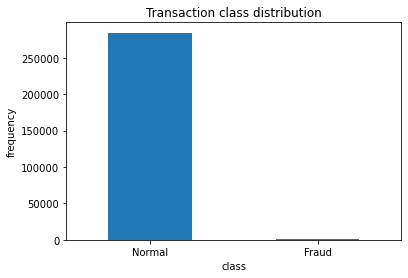

In [8]:
count=pd.value_counts(df['Class'],sort=True)
count.plot(kind='bar',rot=0)
plt.title('Transaction class distribution')
plt.xticks(range(2),labels)
plt.xlabel('class')
plt.ylabel('frequency')

In [9]:
fraud=df[df['Class']==1]
normal=df[df['Class']==0]

In [10]:
fraud.shape

(492, 31)

In [11]:
normal.shape

(284315, 31)

In [12]:
fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [13]:
fraud.Amount.count()

492

In [14]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [15]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

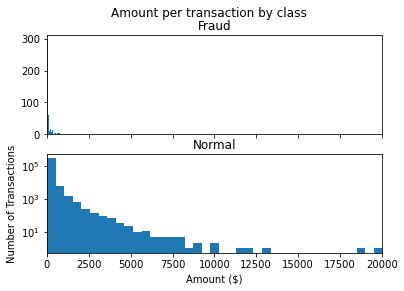

In [16]:
f, (a, b) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
a.hist(fraud.Amount, bins = 50)
a.set_title('Fraud')
b.hist(normal.Amount, bins = 50)
b.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

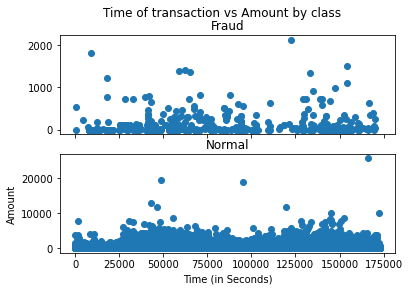

In [17]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [18]:
data=df.sample(frac=0.1,random_state=7)
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
86801,61401.0,-0.987977,1.507284,0.803508,0.081508,-0.377071,-0.890772,0.621683,0.172492,-0.623320,...,-0.189602,-0.591589,0.103171,0.367964,-0.099578,0.047964,-0.113097,0.026416,49.99,0
34867,37861.0,-1.240823,1.507803,0.229557,-0.449387,0.285821,0.606289,-0.121016,1.051490,-1.014859,...,-0.123493,-0.543730,-0.050746,-1.330257,-0.034010,0.156313,-0.091106,-0.051808,10.71,0
151239,95074.0,-1.327519,1.543532,3.007331,4.241863,-0.150692,1.928448,-0.544330,0.445050,0.581979,...,-0.103444,0.559457,-0.184764,0.673958,0.077392,0.463480,0.559759,0.137143,22.70,0
122560,76607.0,1.163792,0.212417,0.540331,1.315578,-0.246162,-0.217715,-0.023605,0.023107,0.266675,...,-0.185168,-0.397422,0.053712,0.055767,0.443358,-0.467240,0.042479,0.022013,6.90,0
77820,57228.0,1.326539,-0.365593,0.756604,0.259893,-0.847251,0.006266,-0.741108,-0.026175,-0.692656,...,-0.378705,-0.585494,-0.020378,-0.484177,0.356759,-0.400056,0.083157,0.040012,23.74,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133802,80537.0,1.222909,0.269818,0.180641,0.506454,-0.164063,-0.558848,-0.016472,-0.035360,-0.199764,...,-0.253673,-0.784735,0.070589,-0.037610,0.225938,0.096691,-0.028897,0.018457,8.81,0
62373,50244.0,0.801844,-0.726951,0.387376,1.213152,-0.331646,1.085084,-0.342264,0.351932,0.738138,...,0.078980,0.106519,-0.351971,-0.814881,0.604162,-0.227898,0.032899,0.034565,185.00,0
16628,27986.0,1.112988,0.082737,1.487149,2.919793,-0.880527,0.372913,-0.651966,0.240929,0.557671,...,0.013293,0.369310,-0.120642,0.423649,0.595427,0.215097,0.044511,0.025575,0.00,0
107742,70592.0,1.153051,1.178941,-1.602109,1.486036,1.066293,-1.036789,0.592928,-0.094872,-0.691282,...,-0.130005,-0.291587,-0.194046,-0.310277,0.748952,-0.281889,0.050944,0.083861,5.49,0


In [19]:
data.shape

(28481, 31)

In [20]:
Fraud=data[data['Class']==1]
Valid=data[data['Class']==0]


In [21]:
outlier=len(Fraud)/len(Valid)
outlier

0.0014768451773972363

In [22]:
len(Fraud)

42

In [23]:
len(Valid)

28439

<AxesSubplot:>

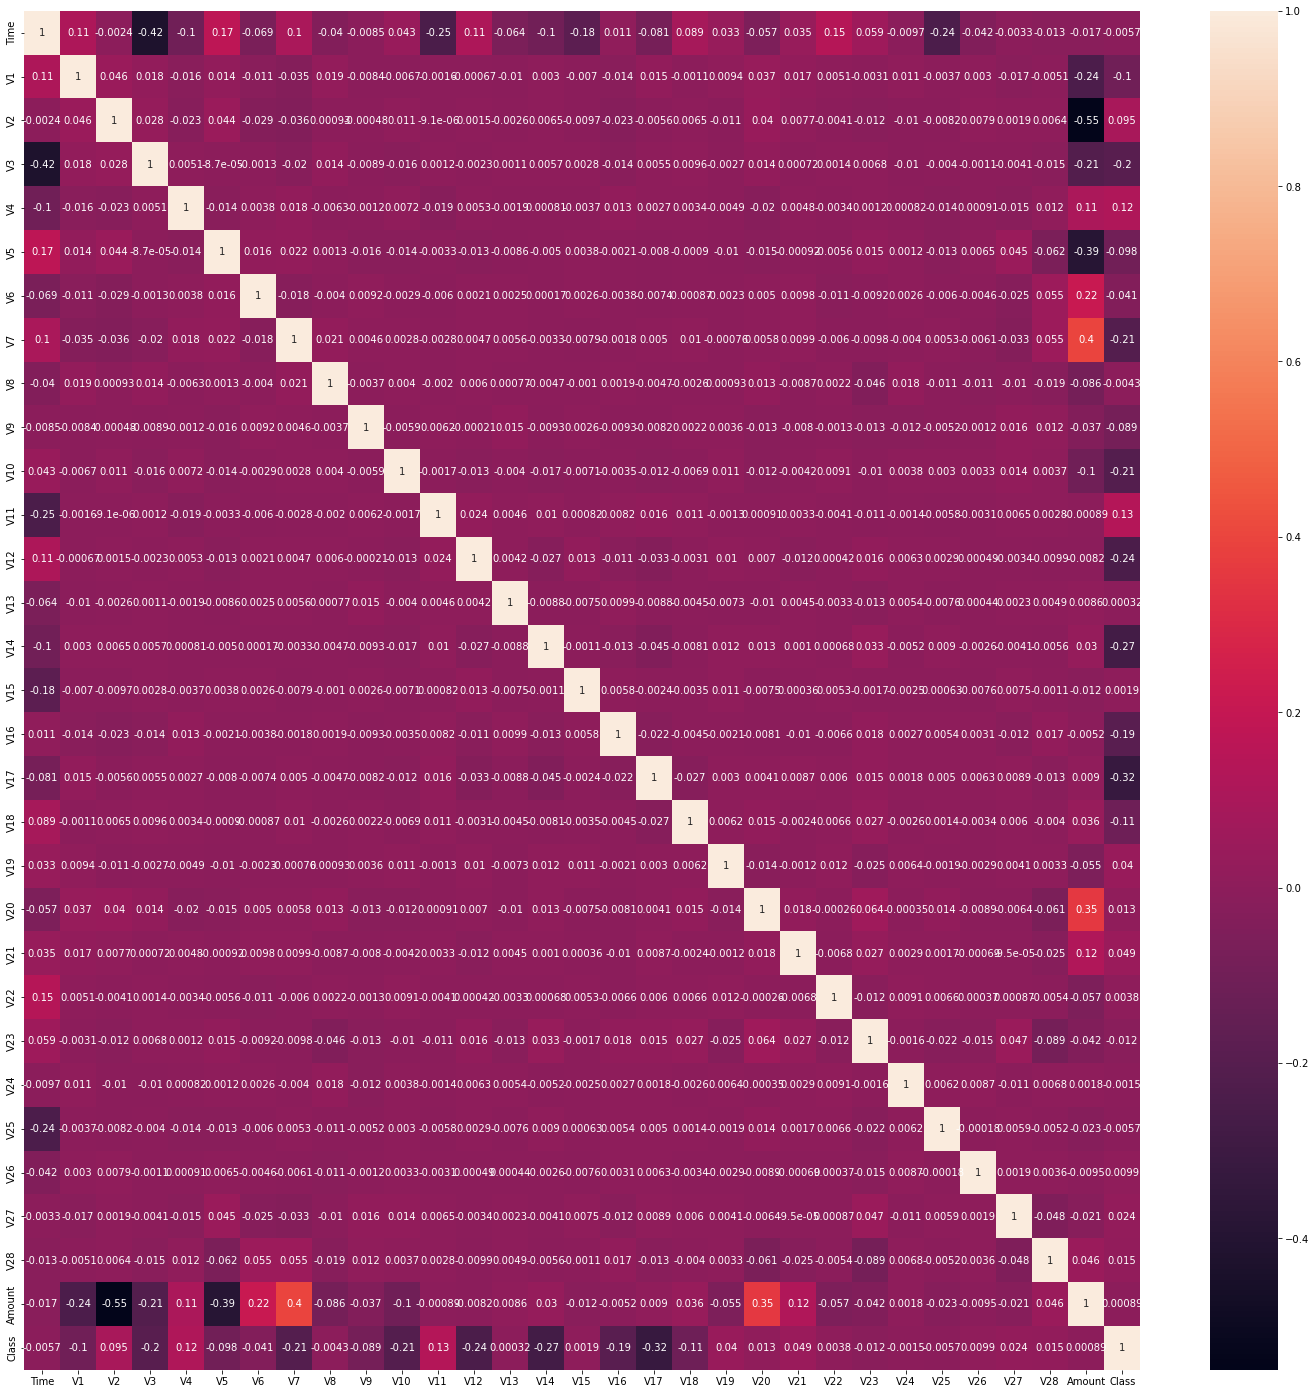

In [24]:
c = data.corr()
plt.figure(figsize=(25, 25))
sns.heatmap(c, annot=True)

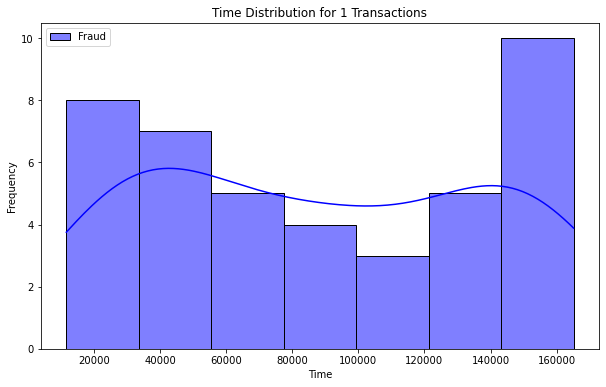

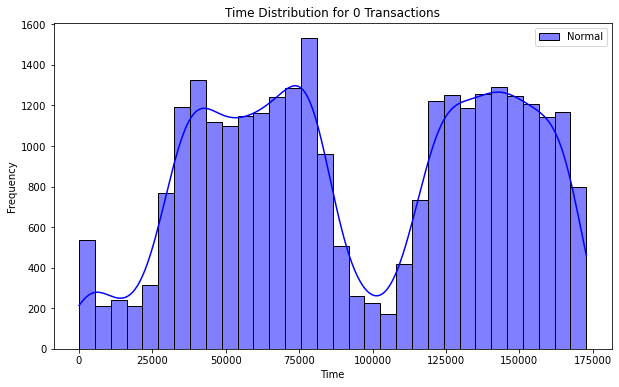

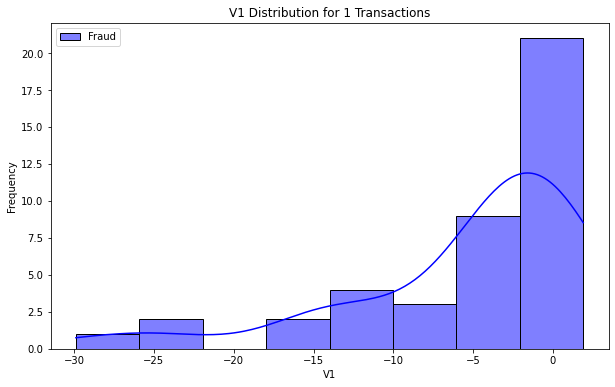

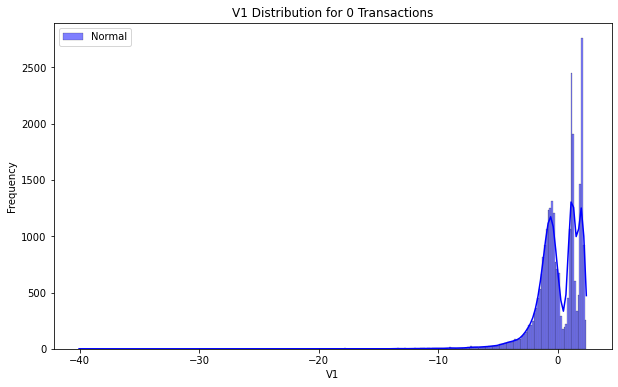

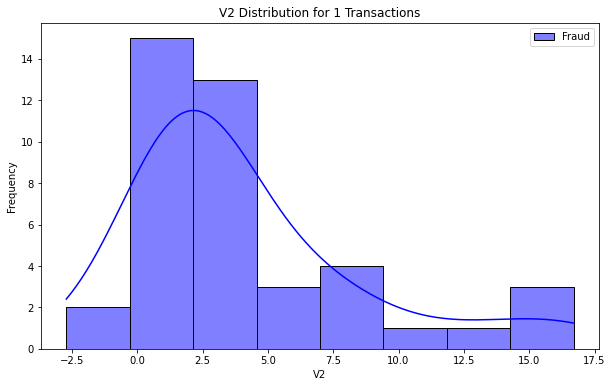

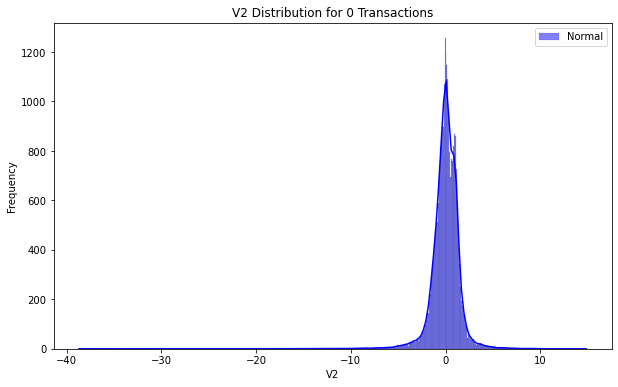

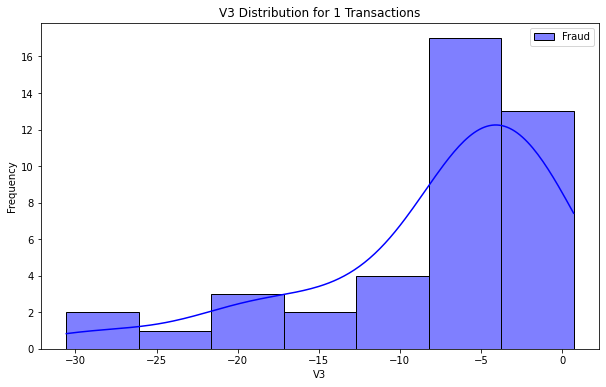

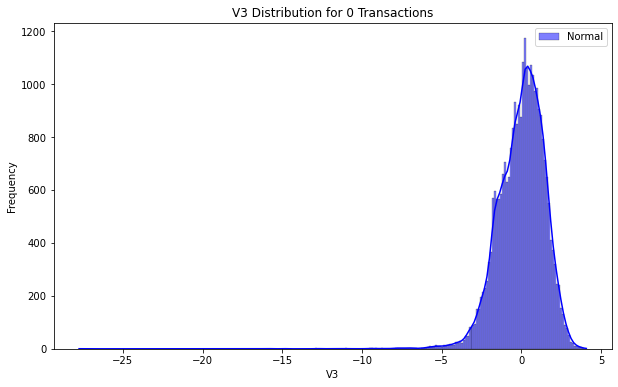

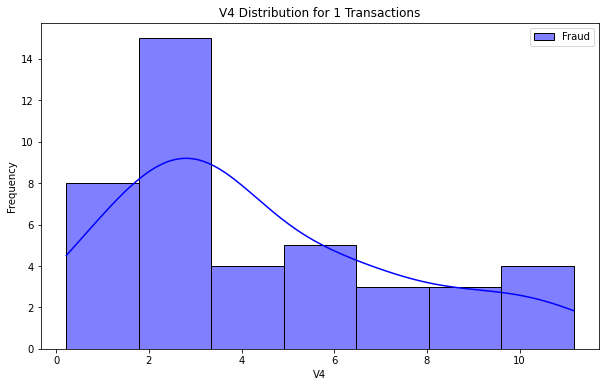

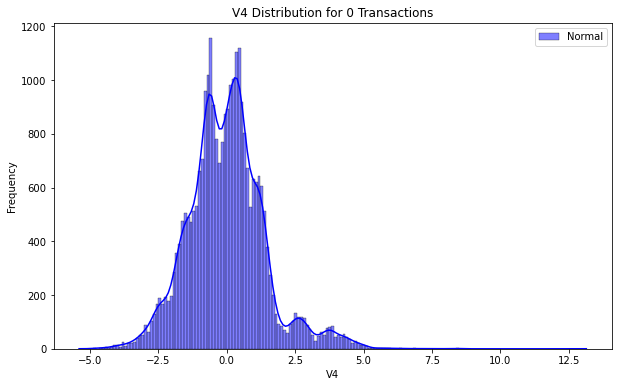

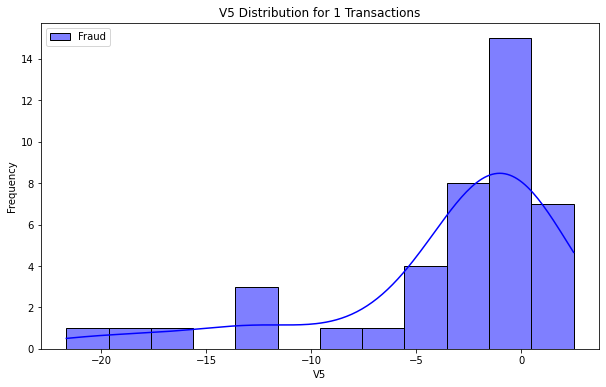

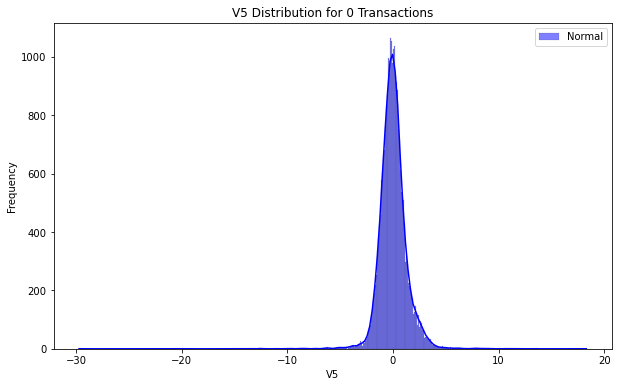

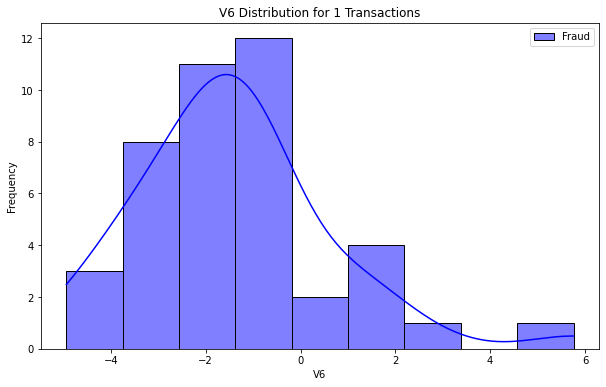

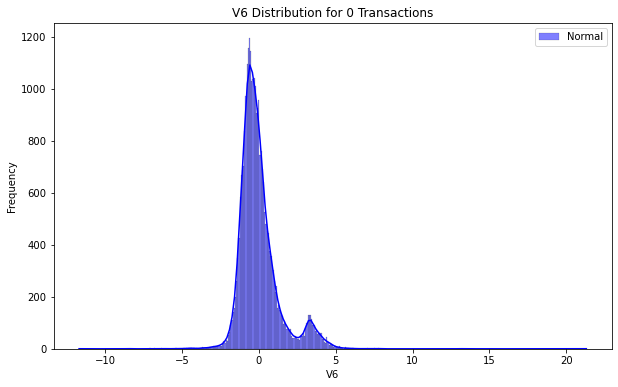

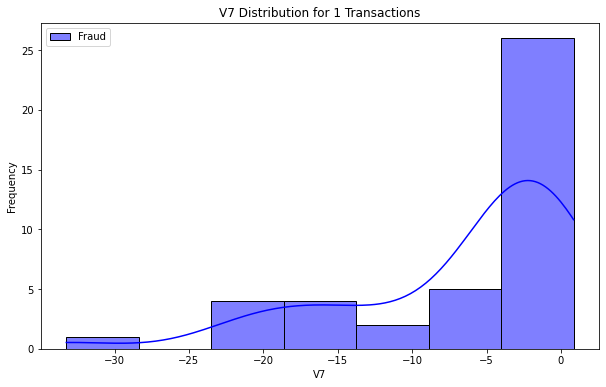

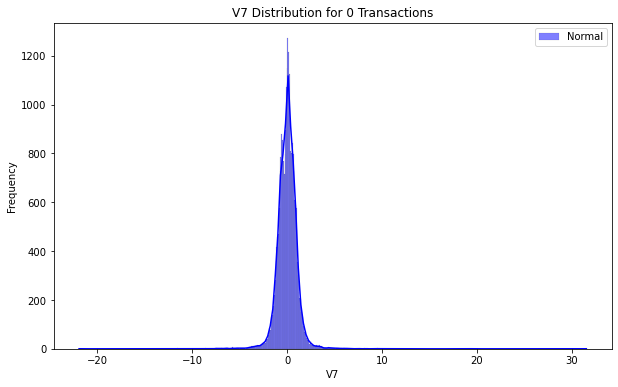

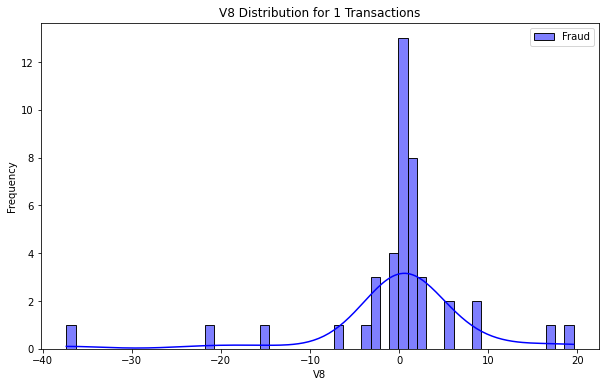

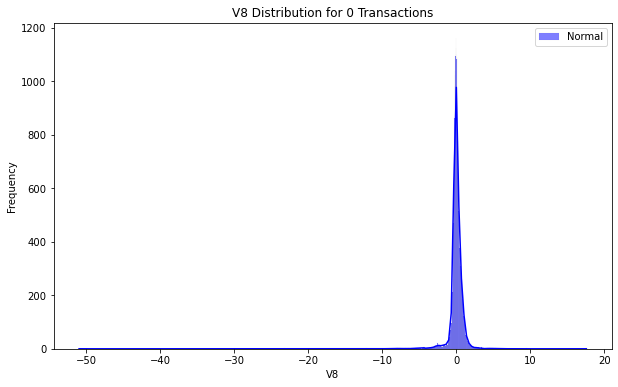

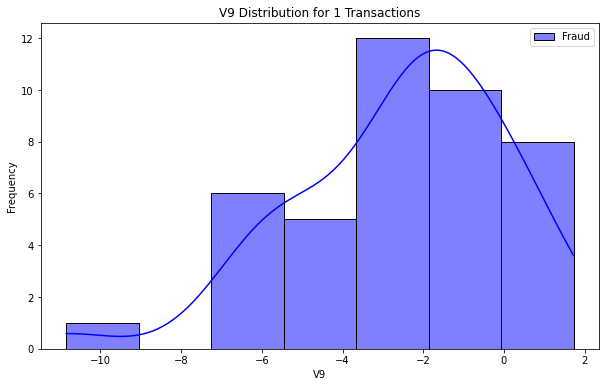

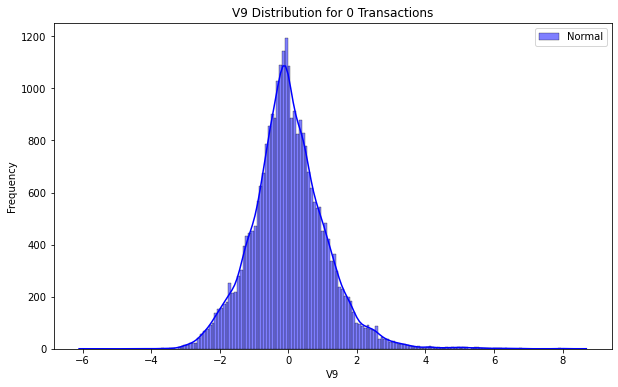

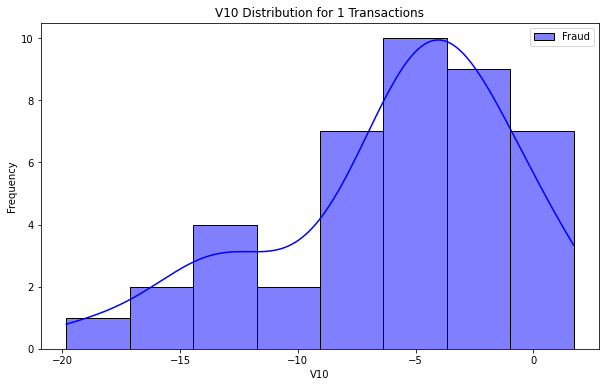

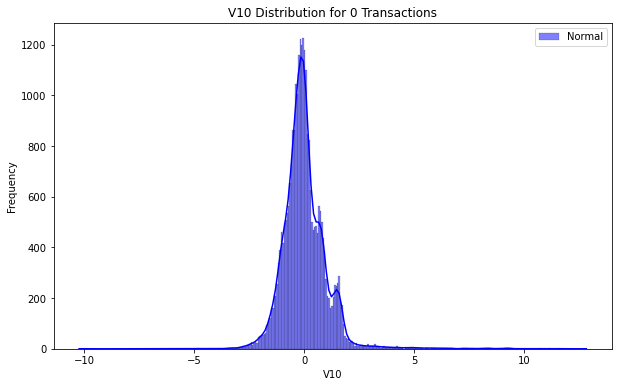

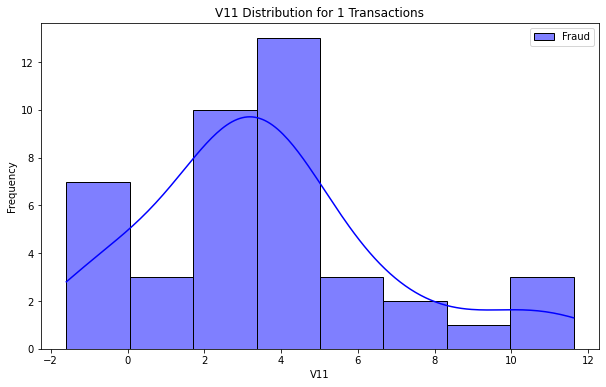

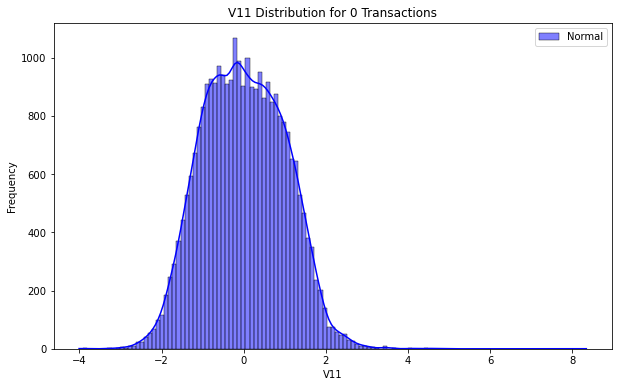

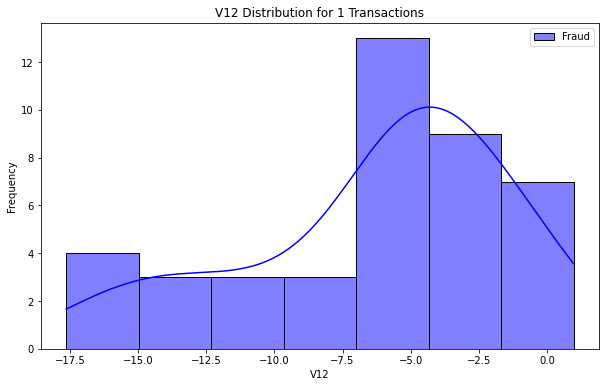

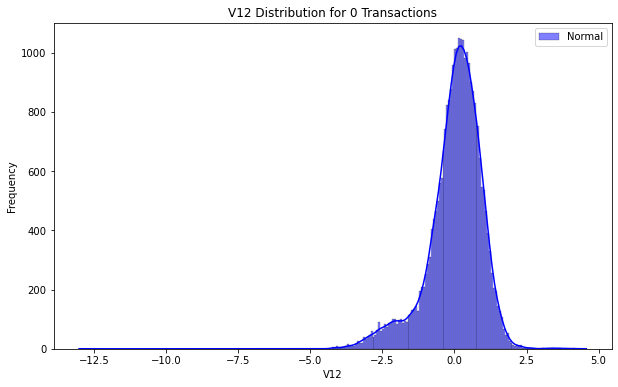

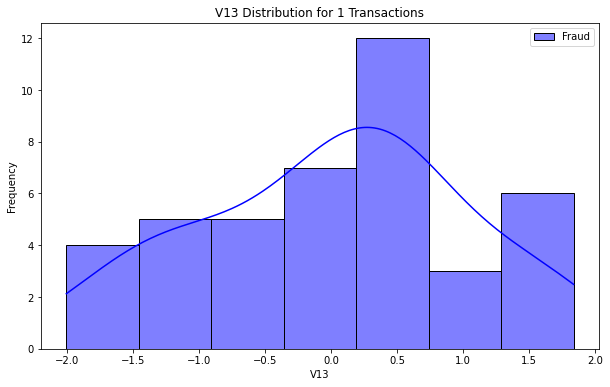

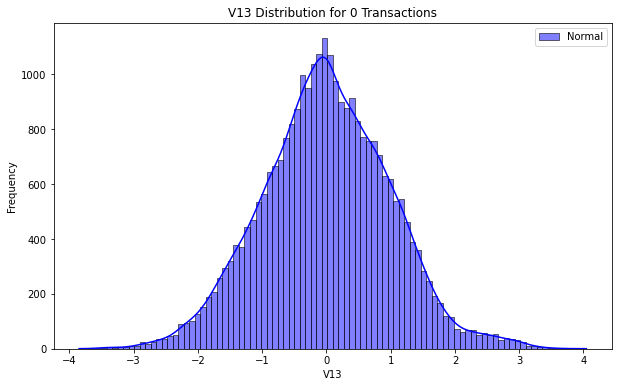

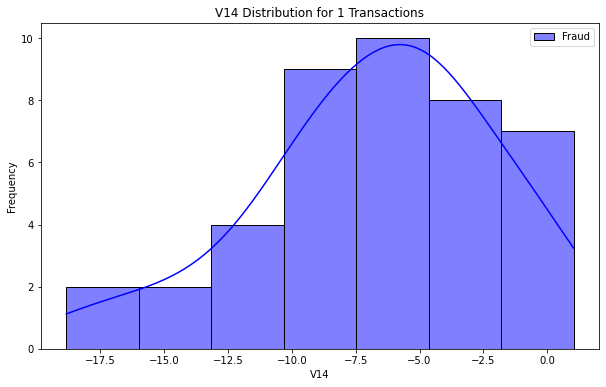

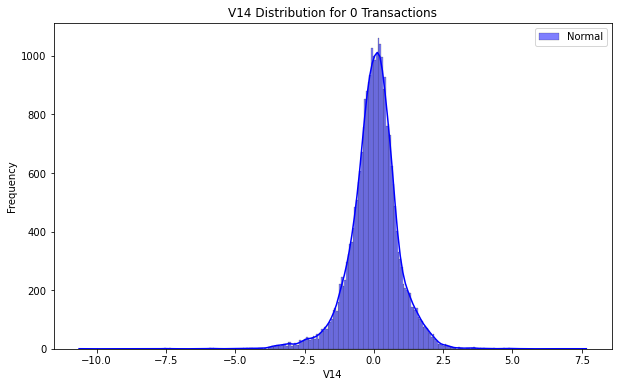

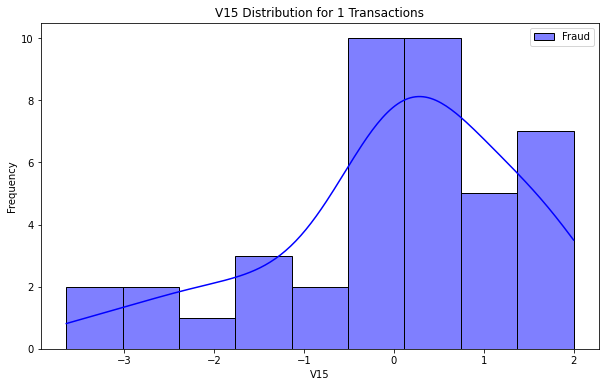

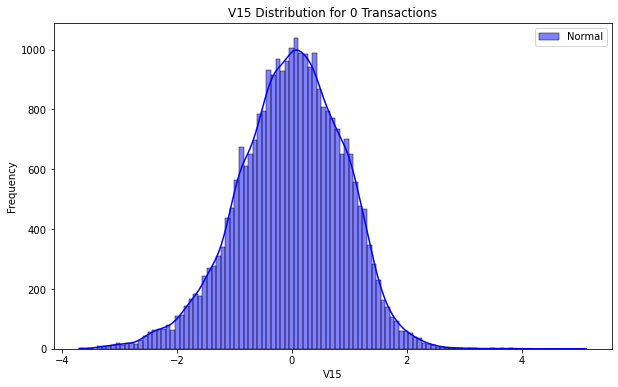

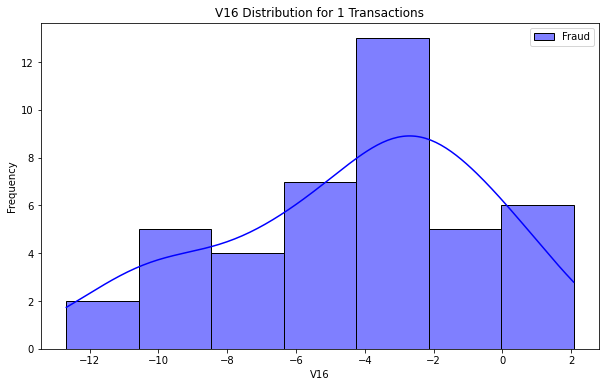

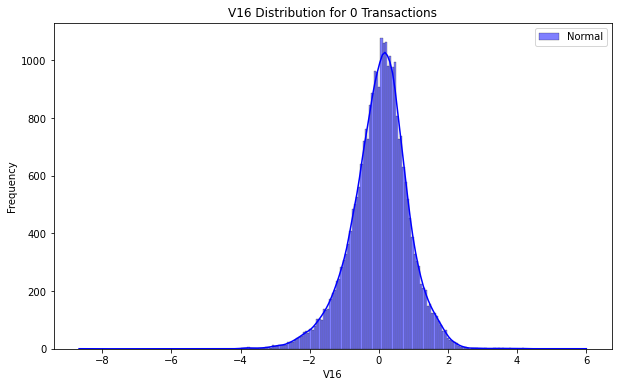

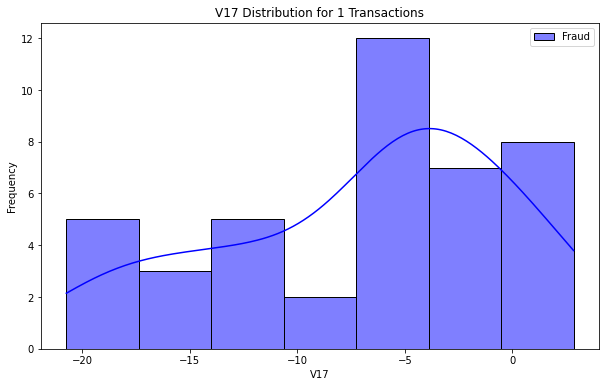

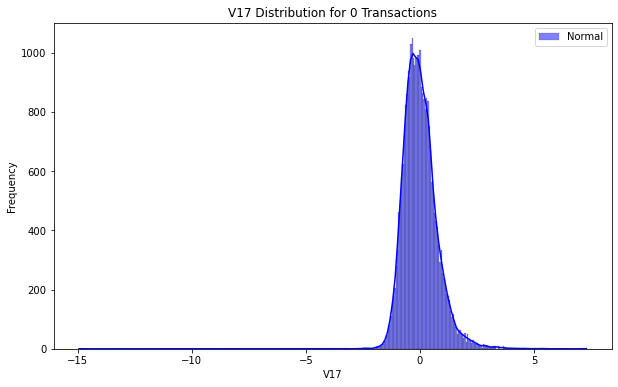

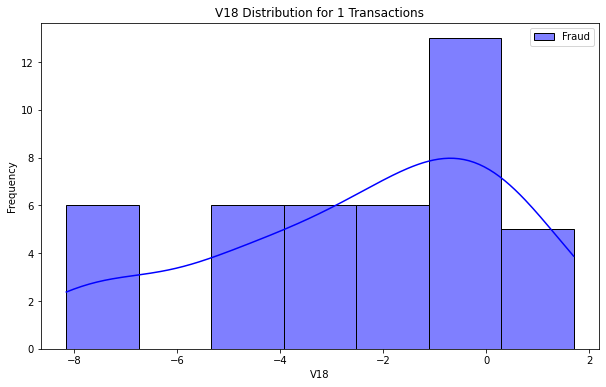

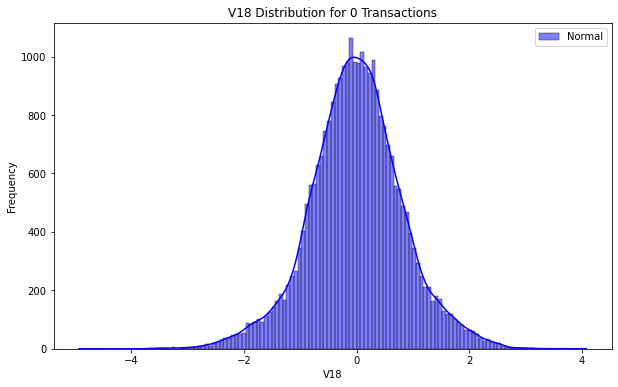

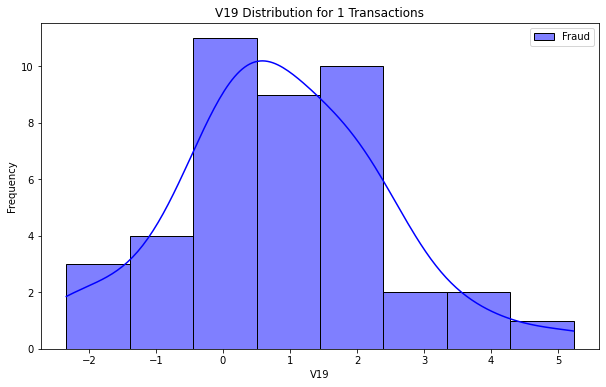

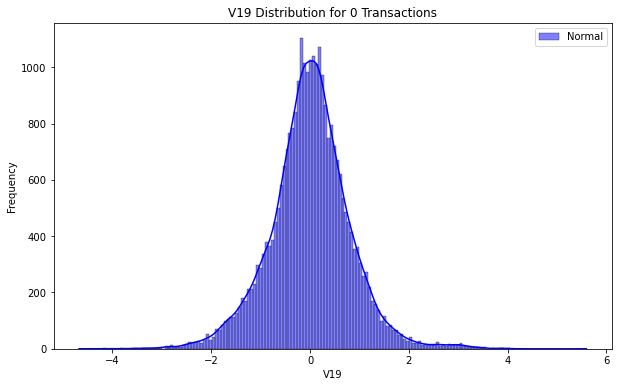

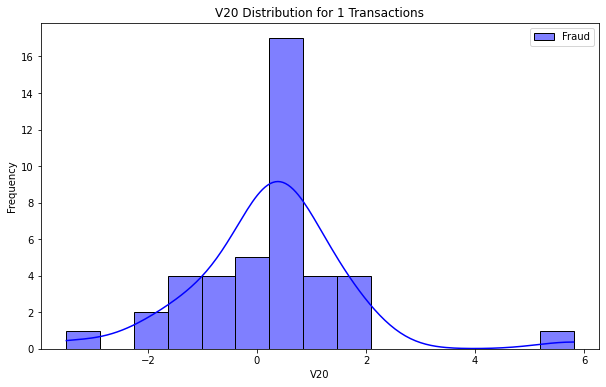

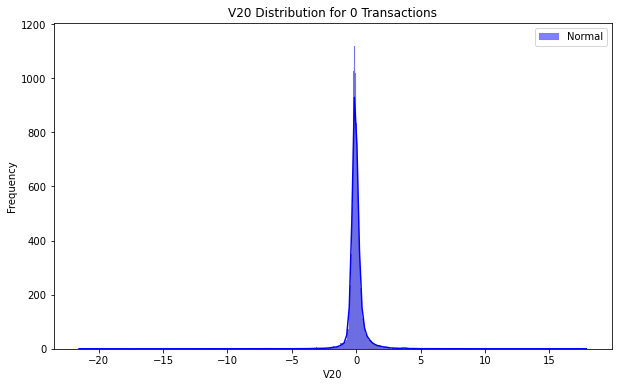

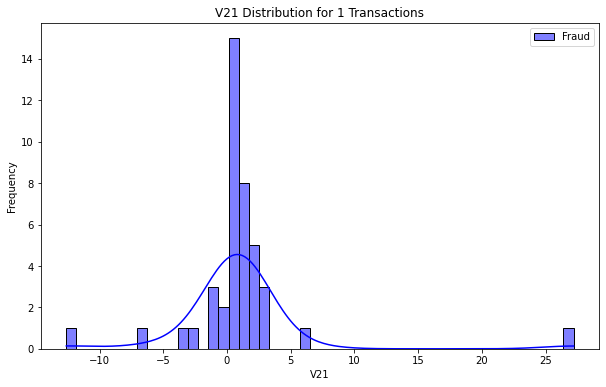

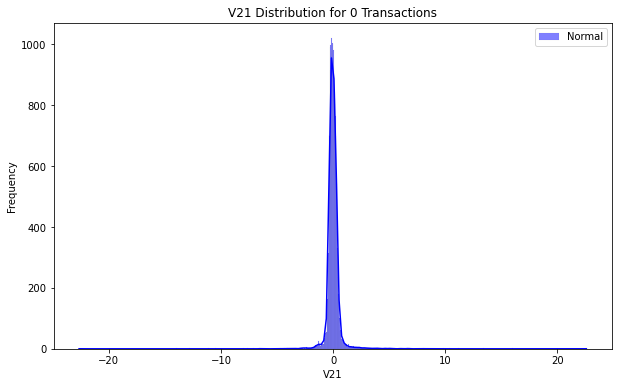

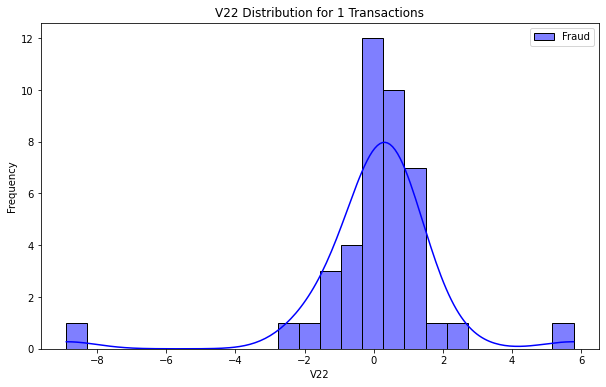

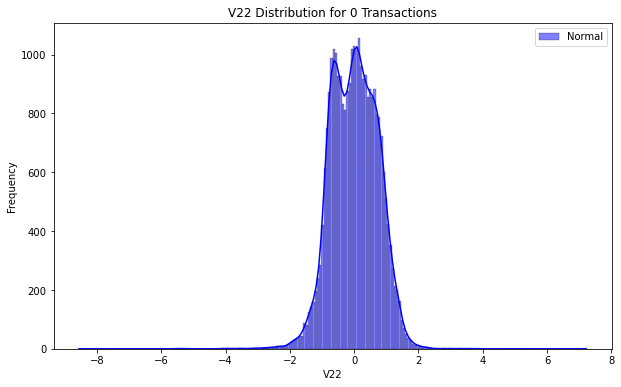

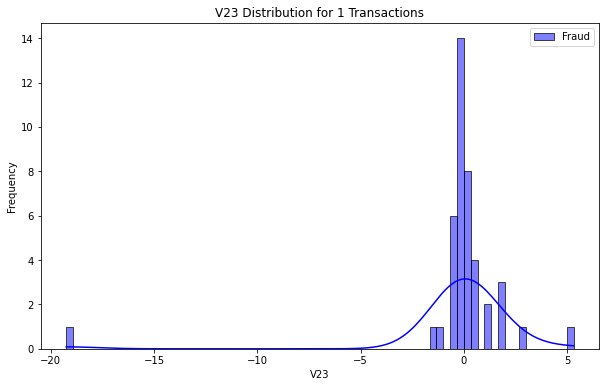

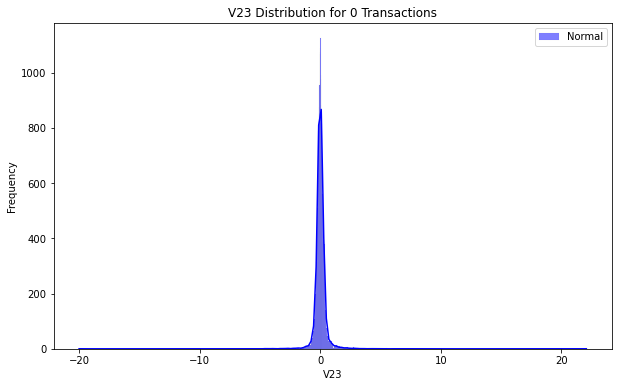

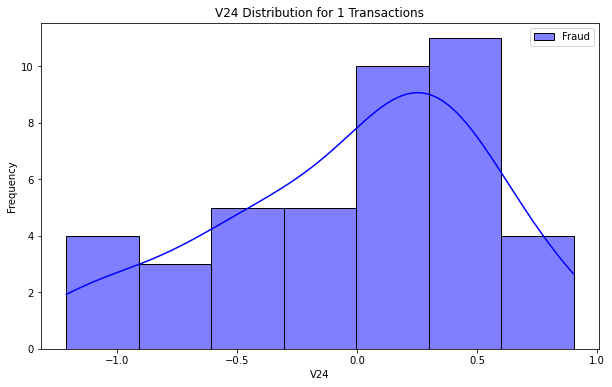

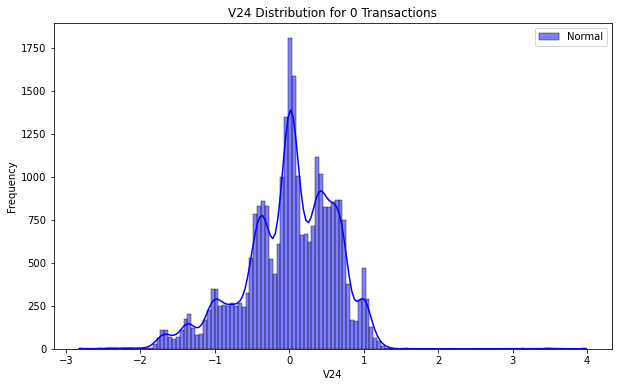

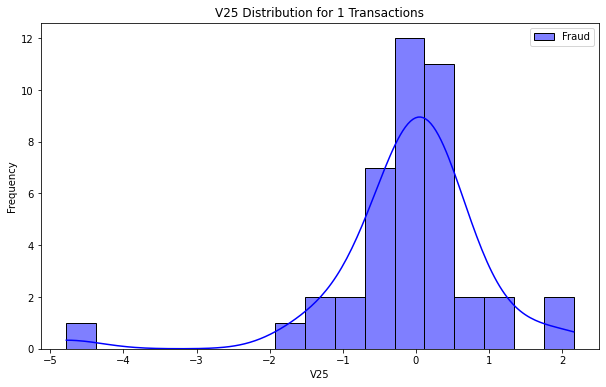

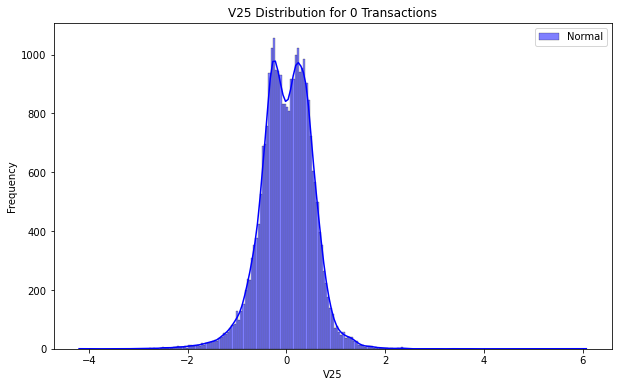

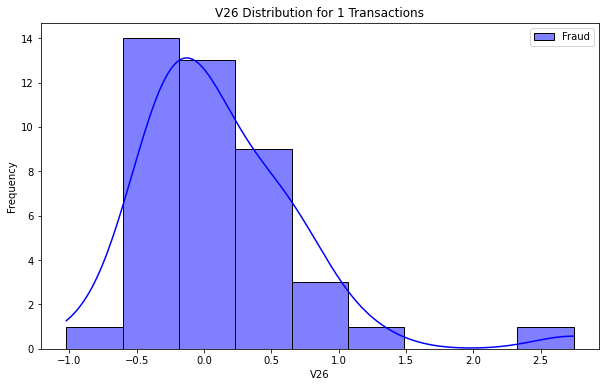

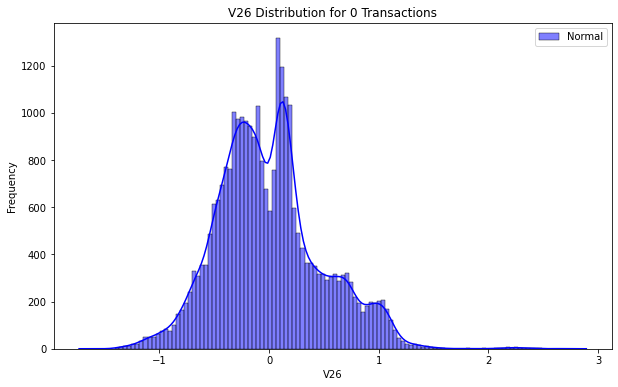

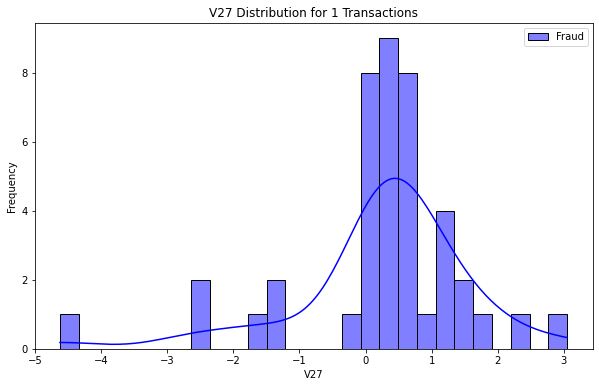

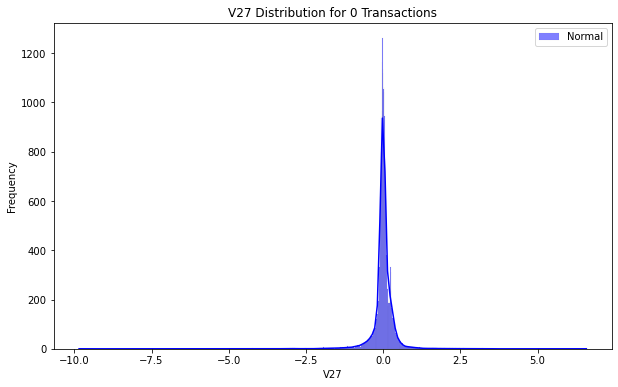

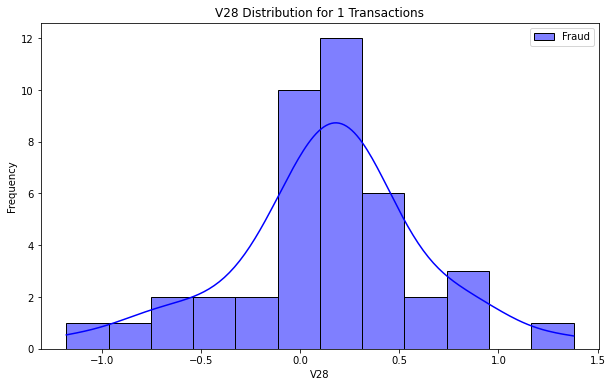

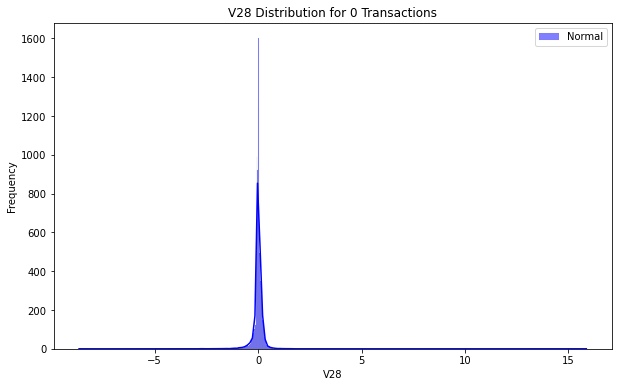

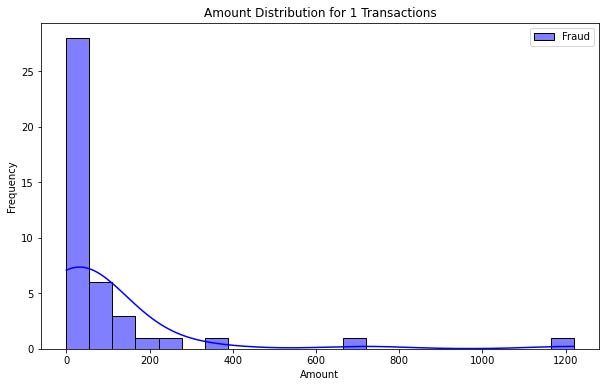

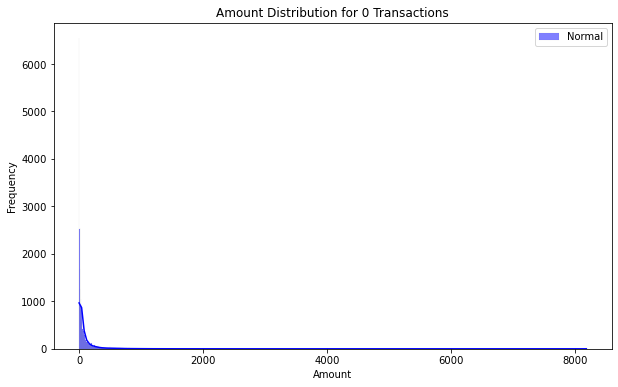

In [25]:
def plot_feature_distribution(data, feature, label):
    plt.figure(figsize=(10, 6))
    sns.histplot(data[data['Class'] == label][feature], kde=True, color='blue', label='Fraud' if label == 1 else 'Normal')
    plt.title(f'{feature} Distribution for {label} Transactions')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

features = data.columns[:-1]  
for feature in features:
    plot_feature_distribution(data, feature, 1)  # Fraud transactions
    plot_feature_distribution(data, feature, 0)  # Normal transactions


In [26]:
state = np.random.RandomState(42)
X = data.drop(['Class'],axis=1)
Y = data['Class']
print(X.shape)
print(Y.shape)

(28481, 30)
(28481,)


In [27]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
86801,61401.0,-0.987977,1.507284,0.803508,0.081508,-0.377071,-0.890772,0.621683,0.172492,-0.623320,...,0.021002,-0.189602,-0.591589,0.103171,0.367964,-0.099578,0.047964,-0.113097,0.026416,49.99
34867,37861.0,-1.240823,1.507803,0.229557,-0.449387,0.285821,0.606289,-0.121016,1.051490,-1.014859,...,-0.036387,-0.123493,-0.543730,-0.050746,-1.330257,-0.034010,0.156313,-0.091106,-0.051808,10.71
151239,95074.0,-1.327519,1.543532,3.007331,4.241863,-0.150692,1.928448,-0.544330,0.445050,0.581979,...,0.684855,-0.103444,0.559457,-0.184764,0.673958,0.077392,0.463480,0.559759,0.137143,22.70
122560,76607.0,1.163792,0.212417,0.540331,1.315578,-0.246162,-0.217715,-0.023605,0.023107,0.266675,...,-0.200455,-0.185168,-0.397422,0.053712,0.055767,0.443358,-0.467240,0.042479,0.022013,6.90
77820,57228.0,1.326539,-0.365593,0.756604,0.259893,-0.847251,0.006266,-0.741108,-0.026175,-0.692656,...,-0.408065,-0.378705,-0.585494,-0.020378,-0.484177,0.356759,-0.400056,0.083157,0.040012,23.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133802,80537.0,1.222909,0.269818,0.180641,0.506454,-0.164063,-0.558848,-0.016472,-0.035360,-0.199764,...,-0.047167,-0.253673,-0.784735,0.070589,-0.037610,0.225938,0.096691,-0.028897,0.018457,8.81
62373,50244.0,0.801844,-0.726951,0.387376,1.213152,-0.331646,1.085084,-0.342264,0.351932,0.738138,...,0.173151,0.078980,0.106519,-0.351971,-0.814881,0.604162,-0.227898,0.032899,0.034565,185.00
16628,27986.0,1.112988,0.082737,1.487149,2.919793,-0.880527,0.372913,-0.651966,0.240929,0.557671,...,-0.229880,0.013293,0.369310,-0.120642,0.423649,0.595427,0.215097,0.044511,0.025575,0.00
107742,70592.0,1.153051,1.178941,-1.602109,1.486036,1.066293,-1.036789,0.592928,-0.094872,-0.691282,...,-0.056213,-0.130005,-0.291587,-0.194046,-0.310277,0.748952,-0.281889,0.050944,0.083861,5.49


In [28]:
Y

86801     0
34867     0
151239    0
122560    0
77820     0
         ..
133802    0
62373     0
16628     0
107742    0
234699    0
Name: Class, Length: 28481, dtype: int64

## Models

### Isolation Forest Algorithm

In [29]:
isolation_forest = IsolationForest(n_estimators=100, max_samples=len(X), 
                                   contamination=outlier, random_state=state)

isolation_forest.fit(X)

y_pred_isolation_forest = isolation_forest.predict(X)
y_pred_isolation_forest[y_pred_isolation_forest == 1] = 0
y_pred_isolation_forest[y_pred_isolation_forest == -1] = 1

n_errors_isolation_forest = (y_pred_isolation_forest != Y).sum()

print("Isolation Forest:")
print("Number of errors:", n_errors_isolation_forest)
print("Accuracy Score:", accuracy_score(Y, y_pred_isolation_forest))
print("Classification Report:")
print(classification_report(Y, y_pred_isolation_forest))


Isolation Forest:
Number of errors: 59
Accuracy Score: 0.9979284435237527
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28439
           1       0.30      0.31      0.31        42

    accuracy                           1.00     28481
   macro avg       0.65      0.65      0.65     28481
weighted avg       1.00      1.00      1.00     28481



In [30]:
mse_isolation_forest = mean_squared_error(Y, y_pred_isolation_forest)

print("Mean Squared Error (Isolation Forest):", mse_isolation_forest)


Mean Squared Error (Isolation Forest): 0.002071556476247323


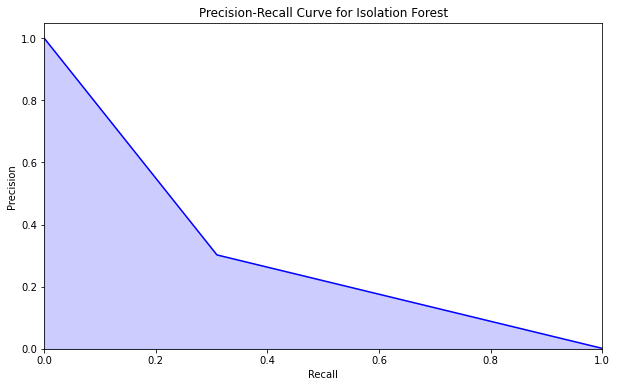

In [31]:
precision, recall, _ = precision_recall_curve(Y, y_pred_isolation_forest)

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='b')
plt.fill_between(recall, precision,  alpha=0.2,color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Isolation Forest')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()


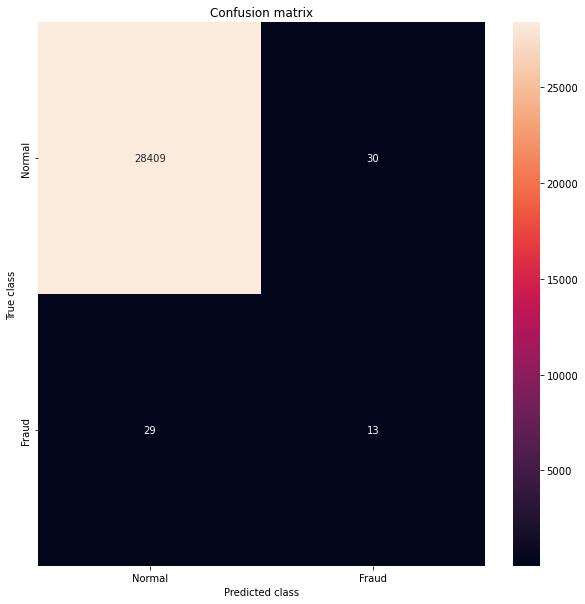

In [32]:
LABELS = ['Normal', 'Fraud'] 
conf_matrix_iso = confusion_matrix(Y, y_pred_isolation_forest) 
plt.figure(figsize =(10, 10)) 
sns.heatmap(conf_matrix_iso, xticklabels = LABELS,  
            yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show()

In [33]:
print("Confusion Matrix:")
print(conf_matrix_iso)

Confusion Matrix:
[[28409    30]
 [   29    13]]


In [34]:
error_indices = np.where(y_pred_isolation_forest != Y)[0]
print("Indices of instances classified as errors:")

error_data = X.iloc[error_indices]
print("Error data:")
print(error_data)


Indices of instances classified as errors:
Error data:
            Time         V1         V2         V3         V4         V5  \
206255  136137.0 -40.042537 -38.430842 -21.277176  10.527243 -16.296090   
13405    23698.0 -10.589953   8.038901 -14.822157   5.989558  -9.035866   
262843  160672.0 -34.092032 -24.237418 -15.758012  12.672760 -14.913249   
154454  101597.0   0.913116   1.145381  -4.602878   2.091803  -0.473224   
263877  161154.0  -3.387601   3.977881  -6.978585   1.657766  -1.100500   
77672    57160.0 -12.747494  10.970856  -7.811358  -0.249907  -5.991778   
252124  155662.0  -1.928613   4.601506  -7.124053   5.716088   1.026579   
238256  149594.0 -21.973814 -20.833816 -12.147176   5.598832  -0.601850   
155296  105064.0 -16.654005 -16.746795   1.308989   5.486626  18.310857   
228158  145381.0 -13.710746 -21.177912  -9.340628   8.385815 -22.756016   
247995  153761.0   1.146259   1.403458  -4.159148   2.660107  -0.323217   
260589  159626.0  -5.984758   5.842984  -3.26

In [35]:
y_pred_isolation_forest

array([0, 0, 0, ..., 0, 0, 0])

In [36]:
print("Shape of y_pred_isolation_forest:", y_pred_isolation_forest.shape)
print("Shape of Y:", Y.shape)

Shape of y_pred_isolation_forest: (28481,)
Shape of Y: (28481,)


### Local Outlier Factor Algorithm

In [37]:
lof = LocalOutlierFactor(n_neighbors=31, algorithm='auto', 
                         leaf_size=15, metric='minkowski', p=2, 
                         metric_params=None, contamination=outlier)

y_pred_lof = lof.fit_predict(X)
y_pred_lof[y_pred_lof == 1] = 0
y_pred_lof[y_pred_lof == -1] = 1

n_errors_lof = (y_pred_lof != Y).sum()

print("\nLocal Outlier Factor:")
print("Number of errors:", n_errors_lof)
print("Accuracy Score:", accuracy_score(Y, y_pred_lof))
print("Classification Report:")
print(classification_report(Y, y_pred_lof))



Local Outlier Factor:
Number of errors: 85
Accuracy Score: 0.9970155542291352
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28439
           1       0.00      0.00      0.00        42

    accuracy                           1.00     28481
   macro avg       0.50      0.50      0.50     28481
weighted avg       1.00      1.00      1.00     28481



In [38]:
mse_lof = mean_squared_error(Y, y_pred_lof)

print("Mean Squared Error (Local Outlier Factor):", mse_lof)


Mean Squared Error (Local Outlier Factor): 0.002984445770864787


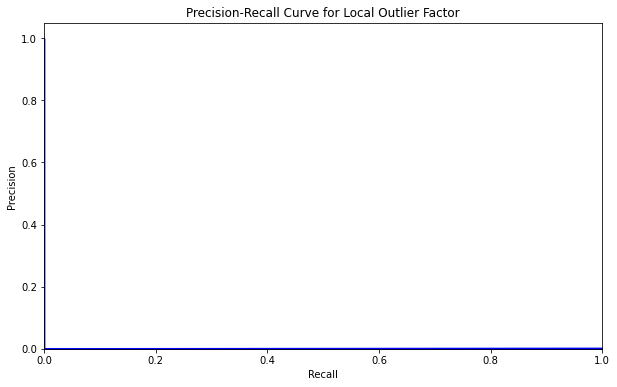

In [39]:
precision, recall, _ = precision_recall_curve(Y, y_pred_lof)

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='b')
plt.fill_between(recall, precision,color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Local Outlier Factor')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()


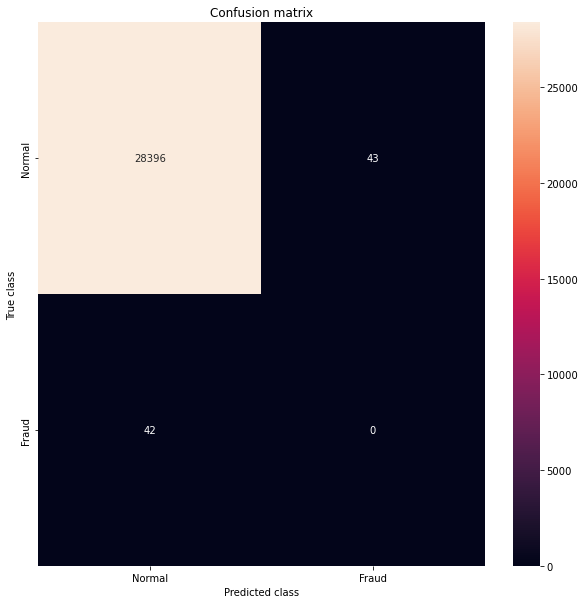

In [40]:
LABELS = ['Normal', 'Fraud'] 
conf_matrix_lof = confusion_matrix(Y, y_pred_lof) 
plt.figure(figsize =(10, 10)) 
sns.heatmap(conf_matrix_lof, xticklabels = LABELS,  
            yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show()

In [41]:
print("Confusion Matrix:")
print(conf_matrix_lof)

Confusion Matrix:
[[28396    43]
 [   42     0]]


In [42]:
error_indices = np.where(y_pred_lof != Y)[0]
print("Indices of instances classified as errors:")

error_data = X.iloc[error_indices]
print("Error data:")
print(error_data)


Indices of instances classified as errors:
Error data:
            Time         V1        V2         V3        V4         V5  \
11721    20036.0   1.086121  0.258993   0.159523  2.888920   1.958164   
10690    18088.0 -12.224021  3.854150 -12.466766  9.648311  -2.726961   
281595  170292.0  -1.537999 -0.588936  -1.130590  2.094498 -11.240843   
154277  100983.0  -2.877529 -1.196774   0.554073 -0.438744  -0.412081   
269052  163507.0  -0.592282 -4.417952  -1.862703  2.458411  -1.585069   
...          ...        ...       ...        ...       ...        ...   
203700  134928.0   1.204934  3.238070  -6.010324  5.720847   1.548400   
189587  128471.0   0.909124  1.337658  -4.484728  3.245358  -0.417809   
30442    35926.0  -3.896583  4.518355  -4.454027  5.547453  -4.121459   
149357   91075.0  -1.855061  1.554964  -1.405809  0.669327  -0.280230   
258373  158622.0  -1.548429 -5.418775  -1.907863  5.014313  -1.843403   

              V6         V7        V8        V9  ...       V20      

In [43]:
y_pred_lof

array([0, 0, 0, ..., 0, 0, 0])

In [44]:
y_pred_lof.shape

(28481,)

### Support Vector Machine

In [45]:
from sklearn.svm import OneClassSVM
from sklearn.metrics import accuracy_score, classification_report

svm_model = OneClassSVM(kernel='rbf', gamma=0.1, nu=0.05)
svm_model.fit(X)

y_pred_svm = svm_model.predict(X)
y_pred_svm[y_pred_svm == 1] = 0
y_pred_svm[y_pred_svm == -1] = 1

n_errors_svm = (y_pred_svm != Y).sum()

print("One-Class SVM:")
print("Number of errors:", n_errors_svm)
print("Accuracy Score:", accuracy_score(Y, y_pred_svm))
print("Classification Report:")
print(classification_report(Y, y_pred_svm))

One-Class SVM:
Number of errors: 8213
Accuracy Score: 0.7116323162810294
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.71      0.83     28439
           1       0.00      0.33      0.00        42

    accuracy                           0.71     28481
   macro avg       0.50      0.52      0.42     28481
weighted avg       1.00      0.71      0.83     28481



In [46]:
mse_svm = mean_squared_error(Y, y_pred_svm)

print("Mean Squared Error (Support Vector Machine):", mse_svm)


Mean Squared Error (Support Vector Machine): 0.28836768371897054


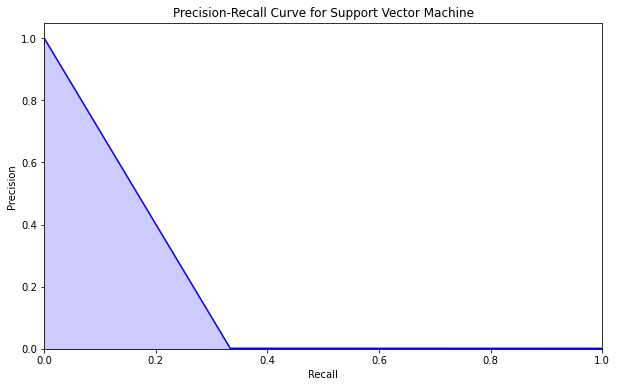

In [47]:
precision, recall, _ = precision_recall_curve(Y, y_pred_svm)

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='b')
plt.fill_between(recall, precision, alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Support Vector Machine')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()


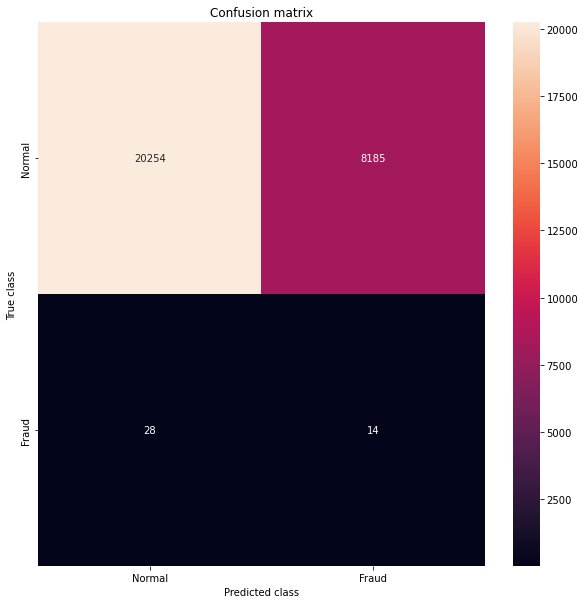

In [48]:
LABELS = ['Normal', 'Fraud'] 
conf_matrix_log = confusion_matrix(Y, y_pred_svm) 
plt.figure(figsize =(10, 10)) 
sns.heatmap(conf_matrix_log, xticklabels = LABELS,  
            yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show()

In [49]:
error_indices = np.where(y_pred_svm != Y)[0]
print("Indices of instances classified as errors:")

error_data = X.iloc[error_indices]
print("Error data:")
print(error_data)


Indices of instances classified as errors:
Error data:
            Time        V1        V2        V3        V4        V5        V6  \
86801    61401.0 -0.987977  1.507284  0.803508  0.081508 -0.377071 -0.890772   
151239   95074.0 -1.327519  1.543532  3.007331  4.241863 -0.150692  1.928448   
77820    57228.0  1.326539 -0.365593  0.756604  0.259893 -0.847251  0.006266   
154911  103584.0 -1.877789 -1.132900  2.715474  0.270357 -0.229064  1.735819   
75802    56257.0 -1.323352 -0.612993  2.137655 -1.359348 -1.364169  0.453458   
...          ...       ...       ...       ...       ...       ...       ...   
133802   80537.0  1.222909  0.269818  0.180641  0.506454 -0.164063 -0.558848   
62373    50244.0  0.801844 -0.726951  0.387376  1.213152 -0.331646  1.085084   
16628    27986.0  1.112988  0.082737  1.487149  2.919793 -0.880527  0.372913   
107742   70592.0  1.153051  1.178941 -1.602109  1.486036  1.066293 -1.036789   
234699  148073.0 -0.897367 -0.861042  0.307339  0.582236 -0.02408

In [50]:
y_pred_svm

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [51]:
y_pred_svm.shape

(28481,)

### Logistic Regression

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train, y_train)

y_pred_log_reg = log_reg_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_log_reg)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

Accuracy: 0.9989468141126909
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5692
           1       0.43      0.60      0.50         5

    accuracy                           1.00      5697
   macro avg       0.71      0.80      0.75      5697
weighted avg       1.00      1.00      1.00      5697



In [53]:
mse_log = mean_squared_error(y_test, y_pred_log_reg)

print("Mean Squared Error (LogisticRegression):", mse_log)


Mean Squared Error (LogisticRegression): 0.00105318588730911


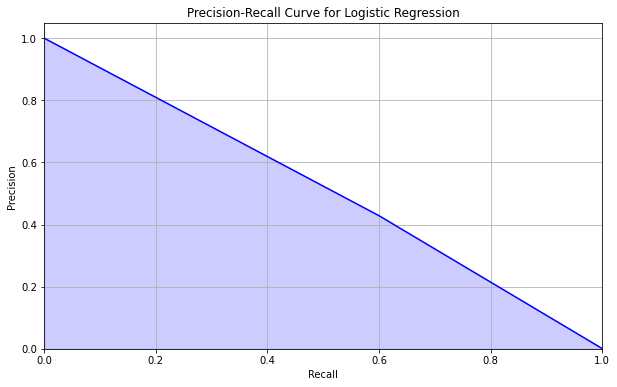

In [54]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_log_reg)

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='b')
plt.fill_between(recall, precision, alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Logistic Regression')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.grid(True)
plt.show()


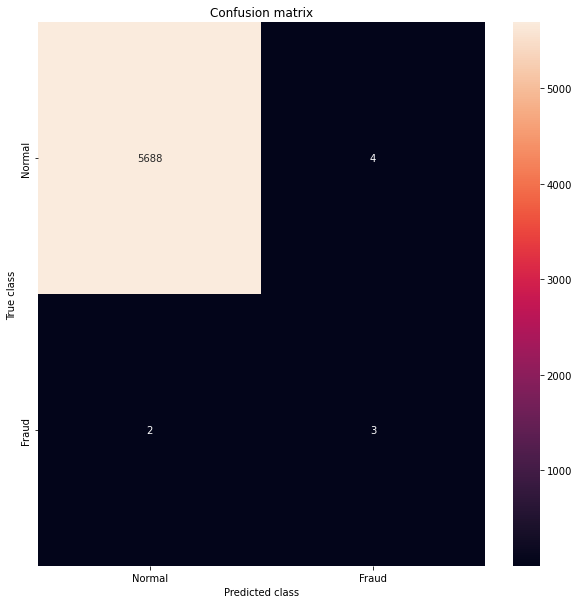

In [55]:
LABELS = ['Normal', 'Fraud'] 
conf_matrix_log = confusion_matrix(y_test, y_pred_log_reg) 
plt.figure(figsize =(10, 10)) 
sns.heatmap(conf_matrix_log, xticklabels = LABELS,  
            yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show()

In [56]:
y_pred_log_reg

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [57]:
y_pred_log_reg.shape

(5697,)

### Random Forest Algorithm

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

random_forest.fit(X_train, y_train)

y_pred_rf = random_forest.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy_rf)
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

Accuracy: 0.9989468141126909
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5692
           1       0.43      0.60      0.50         5

    accuracy                           1.00      5697
   macro avg       0.71      0.80      0.75      5697
weighted avg       1.00      1.00      1.00      5697



In [59]:
mse_rf = mean_squared_error(y_test, y_pred_rf)

print("Mean Squared Error (Random Forest Algorithm):", mse_rf)


Mean Squared Error (Random Forest Algorithm): 0.00105318588730911


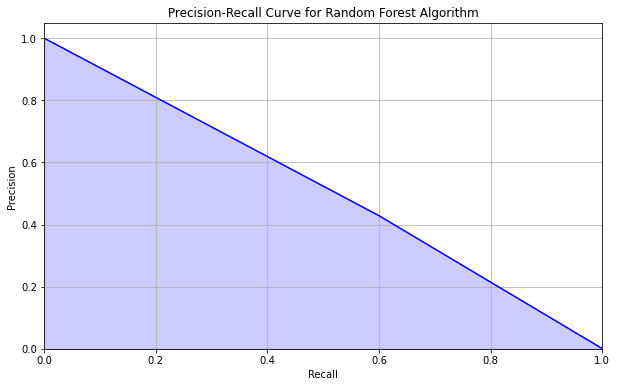

In [60]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_rf)

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='b')
plt.fill_between(recall, precision, alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Random Forest Algorithm')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.grid(True)
plt.show()


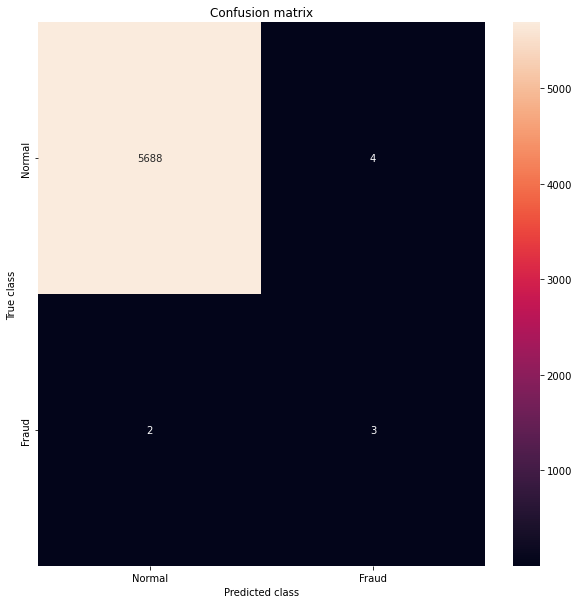

In [61]:
LABELS = ['Normal', 'Fraud'] 
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf) 
plt.figure(figsize =(10, 10)) 
sns.heatmap(conf_matrix_rf, xticklabels = LABELS,  
            yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show()

In [62]:
y_pred_rf

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [63]:
y_pred_rf.shape

(5697,)

### Comparative Performance Evaluation of Credit Card Fraud Detection Models

In [64]:
evaluation_scores = {
    'Model': ['Isolation Forest', 'Local Outlier Factor', 'One-Class SVM', 'Logistic Regression', 'Random Forest'],
    'Accuracy': [0.9979, 0.9970, 0.7116, 0.9989, 0.9989],
    'Precision (Class 0)': [1.00, 1.00, 1.00, 1.00, 1.00],
    'Precision (Class 1)': [0.30, 0.00, 0.00, 0.43, 0.43],
    'Recall (Class 0)': [1.00, 1.00, 0.71, 1.00, 1.00],
    'Recall (Class 1)': [0.31, 0.00, 0.33, 0.60, 0.60],
    'F1-Score (Class 0)': [1.00, 1.00, 0.83, 1.00, 1.00],
    'F1-Score (Class 1)': [0.31, 0.00, 0.00, 0.50, 0.50]
}

models = pd.DataFrame(evaluation_scores)


In [65]:
models

,Model,Accuracy,Precision (Class 0),Precision (Class 1),Recall (Class 0),Recall (Class 1),F1-Score (Class 0),F1-Score (Class 1)
0,Isolation Forest,0.9979,1.0,0.30,1.00,0.31,1.00,0.31
1,Local Outlier Factor,0.9970,1.0,0.00,1.00,0.00,1.00,0.00
2,One-Class SVM,0.7116,1.0,0.00,0.71,0.33,0.83,0.00
3,Logistic Regression,0.9989,1.0,0.43,1.00,0.60,1.00,0.50
4,Random Forest,0.9989,1.0,0.43,1.00,0.60,1.00,0.50


                  Model  Accuracy  Mean Squared Error
0      Isolation Forest  0.997928            0.002072
1  Local Outlier Factor  0.997016            0.002984
2         One-Class SVM  0.711632            0.288368
3   Logistic Regression  0.998947            0.001053
4         Random Forest  0.998947            0.001053


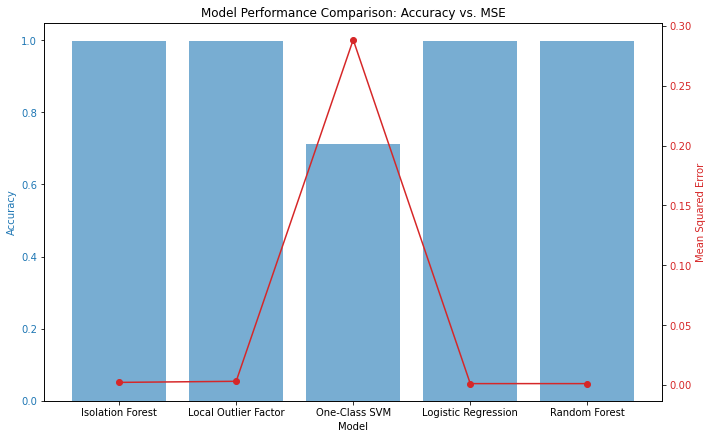

In [66]:
# Collect evaluation scores
evaluation_scores = {
    'Model': ['Isolation Forest', 'Local Outlier Factor', 'One-Class SVM', 'Logistic Regression', 'Random Forest'],
    'Accuracy': [
        accuracy_score(Y, y_pred_isolation_forest),
        accuracy_score(Y, y_pred_lof),
        accuracy_score(Y, y_pred_svm),
        accuracy_score(y_test, y_pred_log_reg),
        accuracy_score(y_test, y_pred_rf)
    ],
    'Mean Squared Error': [
        mean_squared_error(Y, y_pred_isolation_forest),
        mean_squared_error(Y, y_pred_lof),
        mean_squared_error(Y, y_pred_svm),
        mean_squared_error(y_test, y_pred_log_reg),
        mean_squared_error(y_test, y_pred_rf)
    ]
}

# Convert evaluation scores to a DataFrame
evaluation_df = pd.DataFrame(evaluation_scores)

# Display the DataFrame
print(evaluation_df)

# Visualize the performance metrics (Accuracy and MSE)
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel('Model')
ax1.set_ylabel('Accuracy', color='tab:blue')
ax1.bar(evaluation_df['Model'], evaluation_df['Accuracy'], color='tab:blue', alpha=0.6, label='Accuracy')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis to plot Mean Squared Error
ax2 = ax1.twinx()
ax2.set_ylabel('Mean Squared Error', color='tab:red')
ax2.plot(evaluation_df['Model'], evaluation_df['Mean Squared Error'], color='tab:red', marker='o', label='MSE')
ax2.tick_params(axis='y', labelcolor='tab:red')

fig.tight_layout()  # To prevent overlap of labels
plt.title('Model Performance Comparison: Accuracy vs. MSE')
plt.show()
